In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_context('talk')

# Principles of Scale

In [2]:
path ='https://github.com/DS-100/textbook/raw/master/content/'
pp = pd.read_csv(path + 'ch/06/data/plannedparenthood.csv')
pp.head()

,year,screening,abortion
0,2006,2007371,289750
1,2013,935573,327000


The full report is available at https://oversight.house.gov/interactivepage/plannedparenthood.


![viz_planned_parenthood.png](https://github.com/DS-100/textbook/raw/master/assets/viz_planned_parenthood.png)

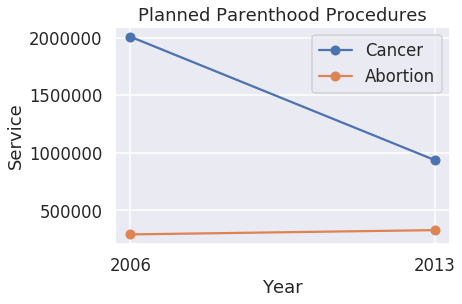

In [3]:
plt.plot(pp['year'], pp['screening'],
         linestyle="solid", marker="o", label='Cancer')
plt.plot(pp['year'], pp['abortion'],
         linestyle="solid", marker="o", label='Abortion')
plt.title('Planned Parenthood Procedures')
plt.xlabel("Year")
plt.ylabel("Service")
plt.xticks([2006, 2013])
plt.legend();

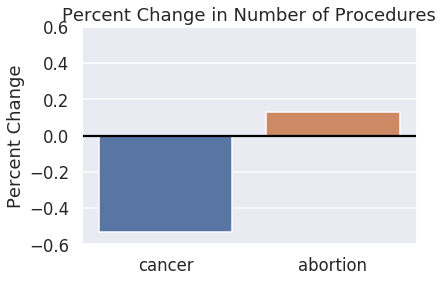

In [4]:
percent_change = pd.DataFrame({
    'percent_change': [
        pp['screening'].iloc[1] / pp['screening'].iloc[0] - 1,
        pp['abortion'].iloc[1] / pp['abortion'].iloc[0] - 1,
    ],
    'procedure': ['cancer', 'abortion'],
    'type': ['percent_change', 'percent_change'],
})
ax = sns.barplot(x='procedure', y='percent_change', data=percent_change)
plt.title('Percent Change in Number of Procedures')
plt.xlabel('')
plt.ylabel('Percent Change')
plt.ylim(-0.6, 0.6)
plt.axhline(y=0, c='black');

# Principles of Conditioning

The US Bureau of Labor Statistics

![viz_earnings.png](https://github.com/DS-100/textbook/raw/master/assets/viz_earnings.png)

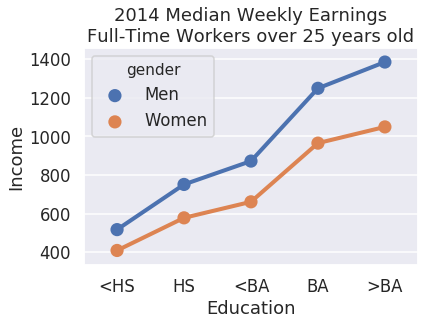

In [5]:
cps = pd.read_csv(path + "ch/06/data/edInc2.csv")
ax = sns.pointplot(x="educ", y="income", hue="gender", data=cps)
ticks = ["<HS", "HS", "<BA", "BA", ">BA"]
ax.set_xticklabels(ticks)
ax.set_xlabel("Education")
ax.set_ylabel("Income")
ax.set_title("2014 Median Weekly Earnings\nFull-Time Workers over 25 years old");

# Principles of Perception

Carbon dioxide emissions over time split by country

![https://github.com/DS-100/textbook/raw/master/assets/viz_emissions.png](https://github.com/DS-100/textbook/raw/master/assets/viz_emissions.png)

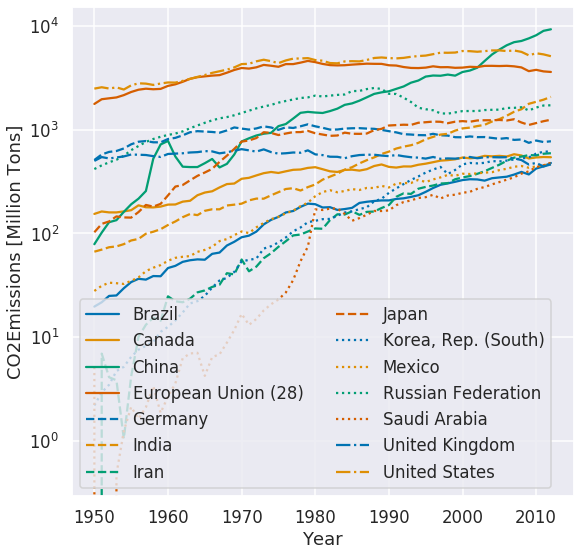

In [6]:
co2 = pd.read_csv(path + "ch/06/data/CAITcountryCO2.csv", skiprows = 2,
                  names = ["Country", "Year", "CO2"])
last_year = co2.Year.iloc[-1]
q = f"Country != 'World' and Country != 'European Union (15)' and Year == {last_year}"
top14_lasty = co2.query(q).sort_values('CO2', ascending=False).iloc[:14]
top14 = co2[co2.Country.isin(top14_lasty.Country) & (co2.Year >= 1950)]

from cycler import cycler
linestyles = (['-', '--', ':', '-.']*3)[:7]
colors = sns.color_palette('colorblind')[:4]
lines_c = cycler('linestyle', linestyles)
color_c = cycler('color', colors)
fig, ax = plt.subplots(figsize=(9, 9))
ax.set_prop_cycle(lines_c * color_c)
x, y ='Year', 'CO2'
for name, df in top14.groupby('Country'):
    ax.semilogy(df[x], df[y], label=name)
ax.set_xlabel(x)
ax.set_ylabel(y + "Emissions [Million Tons]")
ax.legend(ncol=2, frameon=True);

# Principles of Transformation

In 1619, Kepler recorded down the following set of data to discover his Third Law of Planetary Motion:

In [7]:
planets = pd.read_csv(path + "ch/06/data/planets.data",
       delim_whitespace=True, comment="#", usecols=[0, 1, 2])
planets

,planet,mean_dist,period
0,Mercury,0.389,87.77
1,Venus,0.724,224.70
2,Earth,1.000,365.25
3,Mars,1.524,686.95
4,Jupiter,5.200,4332.62
5,Saturn,9.510,10759.20


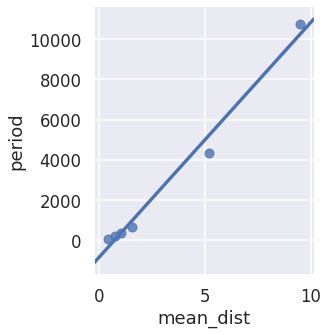

In [8]:
sns.lmplot(x='mean_dist', y='period', data=planets, ci=False)

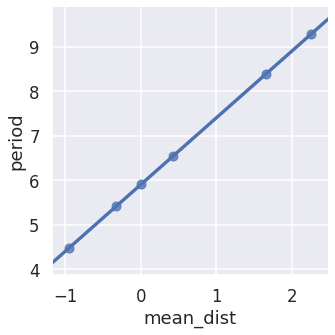

In [9]:
sns.lmplot(x='mean_dist', y='period',
  data=np.log(planets.iloc[:, [1, 2]]), ci=False);

$$
\begin{aligned}
\log(period) &= m \log(dist) + b \\
period &= e^{m \log(dist) + b} \\
period &= e^b dist^m \\
period &= C \cdot dist^m
\end{aligned}
$$

# Principles of Smoothing

Cherry Blossom Run, an annual 10-mile run in Washington D.C. 

In [10]:
runners = pd.read_csv(path + 'ch/06/data/cherryBlossomMen.csv').dropna()
runners

,year,place,age,time
0,1999,1,28.0,2819.0
1,1999,2,24.0,2821.0
2,1999,3,27.0,2823.0
3,1999,4,28.0,2827.0
4,1999,5,26.0,2851.0
...,...,...,...,...
70064,2012,7188,41.0,8807.0
70065,2012,7189,39.0,8831.0
70066,2012,7190,56.0,8840.0
70067,2012,7191,35.0,8850.0


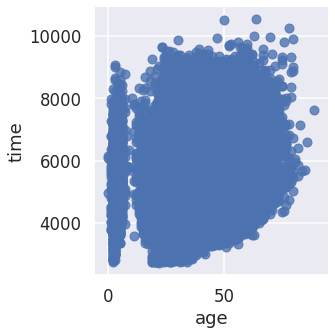

In [11]:
sns.lmplot(x='age', y='time', data=runners, fit_reg=False);

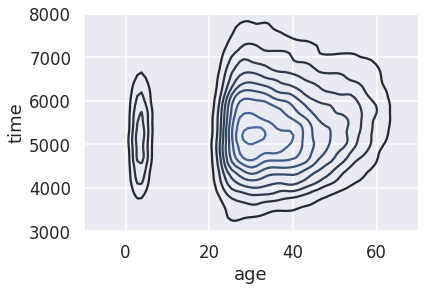

In [12]:
sns.kdeplot(runners['age'], runners['time'])
plt.xlim(-10, 70)
plt.ylim(3000, 8000);